**Gender Classification**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Gender - This is either "Male" or "Female".**

Content
This dataset contains 7 features and a label column.
1.longhair - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".

2.foreheadwidthcm - This column is in CM's. This is the width of the forehead.

3.foreheadheightcm - This is the height of the forehead and it's in Cm's.

4.nosewide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".

5.noselong - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".

6.lipsthin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".

7.distancenosetoliplong - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".



In [10]:
#To load the dataset

df=pd.read_csv("/content/drive/MyDrive/ItVedantPythonAWPClasswork/csv datasets/gender_classification_v7.csv")
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [11]:
df.shape

(5001, 8)

In [12]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [13]:
#checking type to confirm null values
df.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [14]:
#checking duplicate values
df.duplicated().sum()

1768

In [15]:
# Now Split DataSet into 2 parts
# Numeric type and Categorical type
df_num=df.select_dtypes(['int64','float64'])
df_cat=df.select_dtypes(object)

In [16]:
df_num.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0


In [17]:
df_cat.head()

,gender
0,Male
1,Female
2,Male
3,Male
4,Female


In [18]:
# To convert categorical type data into numeric type.
# Use Label Encoder
from sklearn.preprocessing import LabelEncoder

In [19]:
for col in df_cat:
    # create an object of LabelEncoder
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])
    

In [20]:
df_cat.head()

,gender
0,1
1,0
2,1
3,1
4,0


In [21]:
df_cat.dtypes

gender    int64
dtype: object

In [22]:
# After applying LabelEncoder we concatenate df_cat and df_num.
df_new=pd.concat([df_num,df_cat],axis=1)


In [23]:
df_new.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [24]:
# Now Select input and output
X=df_new.drop('gender',axis=1)   # input 
Y=df_new['gender']               # output

In [25]:
X.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0


In [26]:
Y.head()

0    1
1    0
2    1
3    1
4    0
Name: gender, dtype: int64

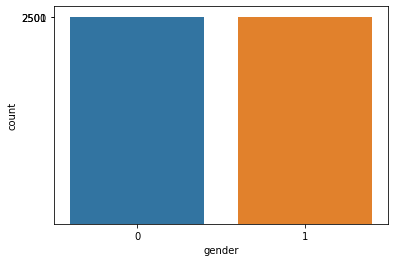

In [27]:
sns.countplot(data=df_new,x='gender')
f=df_new['gender'].value_counts()
plt.yticks(f)
plt.show()

In [28]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,
                                    random_state=1,stratify=Y)
#stratify=output variablename

In [29]:
Y_train.value_counts()

0    1750
1    1750
Name: gender, dtype: int64

In [30]:
Y_test.value_counts()

0    751
1    750
Name: gender, dtype: int64

In [31]:
# Now applying Scaling on input data X_train and X_test before we train the model
# Apply StandardScaler on input data training and testing
from sklearn.preprocessing import StandardScaler
# Create an object of StandardScaler class
ss=StandardScaler()
#means apply standard scaler for X_train and X_test data
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [32]:
X_train.shape, X_test.shape

((3500, 7), (1501, 7))

In [33]:
#create a architecture of neural network
import tensorflow as tf
#create a object of Sequential class
model=tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=7,activation='relu',input_shape=(X.shape[1],)),
       tf.keras.layers.Dense(units=7,activation='relu'),
        tf.keras.layers.Dense(units=1,activation='sigmoid'),
])


In [34]:
#to show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [35]:
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
#create a procedure for callback(Earlystopping)
#Early Stopping : 
#EarlyStopping : for decide epoch
#create a procedure for callback 
from tensorflow.keras.callbacks import EarlyStopping             
#create callback : -
#EarlyStopping() inbuilt function
cb=EarlyStopping(
    monitor="val_loss",  #val_loss means testing error
    min_delta=0.00001, #value of lambda 
    patience=20,
    verbose=1,
    mode="auto", #min loss 
    baseline=None,
    restore_best_weights=False
)

Another way to do validation

In [37]:
#train the model
#trained_model=model.fit(X_train,Y_train,epochs=4000,
#                        validation_split=0.2,callbacks=cb)
#validation_split=0.2 means take 20% data for validation from X_train,Y_train
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=1)



In [38]:
trained_model=model.fit(X_train,Y_train,epochs=4000,
                        validation_data=(X_val,Y_val),callbacks=cb)
#benifical to check which records have been chosen in x_val Y_val later
#this is same as validation_split=0.2 

Epoch 1/4000
88/88 [==============================] - 2s 9ms/step - loss: 0.5462 - accuracy: 0.7786 - val_loss: 0.4148 - val_accuracy: 0.9200
Epoch 2/4000
88/88 [==============================] - 0s 5ms/step - loss: 0.3059 - accuracy: 0.9439 - val_loss: 0.2070 - val_accuracy: 0.9529
Epoch 3/4000
88/88 [==============================] - 0s 4ms/step - loss: 0.1595 - accuracy: 0.9589 - val_loss: 0.1228 - val_accuracy: 0.9614
Epoch 4/4000
88/88 [==============================] - 0s 3ms/step - loss: 0.1109 - accuracy: 0.9621 - val_loss: 0.0973 - val_accuracy: 0.9600
Epoch 5/4000
88/88 [==============================] - 0s 2ms/step - loss: 0.0946 - accuracy: 0.9654 - val_loss: 0.0876 - val_accuracy: 0.9614
Epoch 6/4000
88/88 [==============================] - 0s 3ms/step - loss: 0.0873 - accuracy: 0.9661 - val_loss: 0.0830 - val_accuracy: 0.9614
Epoch 7/4000
88/88 [==============================] - 0s 3ms/step - loss: 0.0836 - accuracy: 0.9671 - val_loss: 0.0810 - val_accuracy: 0.9614
Epoch 

In [39]:
#training loss and training score 
model.evaluate(X_train,Y_train)

88/88 [==============================] - 0s 2ms/step - loss: 0.0599 - accuracy: 0.9782


[0.059949424117803574, 0.9782142639160156]

In [40]:
#testing loss and testing score 
model.evaluate(X_val,Y_val)

22/22 [==============================] - 0s 2ms/step - loss: 0.0632 - accuracy: 0.9686


[0.06321437656879425, 0.9685714244842529]

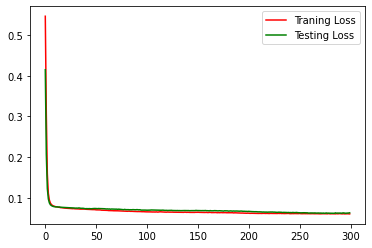

In [41]:
#visualise the loss(training loss) and val_loss(testing loss)
plt.plot(trained_model.history['loss'],color='red',label='Traning Loss')
plt.plot(trained_model.history['val_loss'],color='green',label='Testing Loss')
plt.legend()
plt.show()

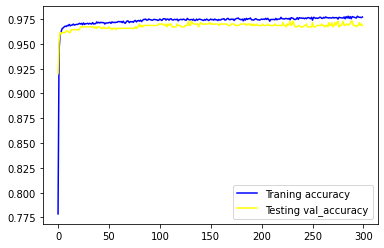

In [42]:
#visualise the loss(training loss) and val_loss(testing loss)
plt.plot(trained_model.history['accuracy'],color='blue',label='Traning accuracy')
plt.plot(trained_model.history['val_accuracy'],color='yellow',label='Testing val_accuracy')
plt.legend()
plt.show()

In [43]:
#testing the model with 30% data 
Y_pred=model.predict(X_test).round(2) #gives the probability value of each class 
#for each row
Y_pred

array([[1.  ],
       [0.01],
       [0.01],
       ...,
       [0.18],
       [0.  ],
       [0.43]], dtype=float32)

In [44]:
Y_pred=np.where(Y_pred>=0.5,1,0)
Y_pred

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [45]:
#generate classification report and confusion martix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       751
           1       0.99      0.97      0.98       750

    accuracy                           0.98      1501
   macro avg       0.98      0.98      0.98      1501
weighted avg       0.98      0.98      0.98      1501

[[740  11]
 [ 24 726]]


In [46]:
#drop-out : similar work as ensembling technique, random forest in ML
#dropout mainly used to reduce overfitting of model.
#20% to 50% note more than 50 not less than 20 on hidden layers only

#create a architecture of neural network

model=tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=7,activation='relu',input_shape=(X.shape[1],)),
      tf.keras.layers.Dropout(0.2), #apply dropout on 1st hidden layer
      tf.keras.layers.Dense(units=7,activation='relu'),
      tf.keras.layers.Dropout(0.2), #apply dropout on 2nd hidden layer
      tf.keras.layers.Dense(units=7,activation='relu'),
      tf.keras.layers.Dropout(0.2), #apply dropout on 3rd hidden layer
      tf.keras.layers.Dense(units=1,activation='sigmoid')
])


In [47]:
#to show model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dropout (Dropout)           (None, 7)                 0         
                                                                 
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_5 (Dense)             (None, 7)                 56        
                                                                 
 dropout_2 (Dropout)         (None, 7)                 0         
                                                                 
 dense_6 (Dense)             (None, 1)                

In [48]:
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
#create a procedure for callback(Earlystopping)
#Early Stopping : 
#EarlyStopping : for decide epoch
#create a procedure for callback 
from tensorflow.keras.callbacks import EarlyStopping             
#create callback : -
#EarlyStopping() inbuilt function
cb=EarlyStopping(
    monitor="val_loss",  #val_loss means testing error
    min_delta=0.00001, #value of lambda 
    patience=20,
    verbose=1,
    mode="auto", #min loss 
    baseline=None,
    restore_best_weights=False
)

In [50]:
trained_model=model.fit(X_train,Y_train,epochs=4000,
                        validation_data=(X_val,Y_val),callbacks=cb)
#benifical to check which records have been chosen in x_val Y_val later
#this is same as validation_split=0.2 

Epoch 1/4000
88/88 [==============================] - 2s 8ms/step - loss: 0.6561 - accuracy: 0.5904 - val_loss: 0.5398 - val_accuracy: 0.8686
Epoch 2/4000
88/88 [==============================] - 0s 5ms/step - loss: 0.4733 - accuracy: 0.7936 - val_loss: 0.2913 - val_accuracy: 0.9257
Epoch 3/4000
88/88 [==============================] - 0s 5ms/step - loss: 0.3390 - accuracy: 0.8504 - val_loss: 0.1677 - val_accuracy: 0.9457
Epoch 4/4000
88/88 [==============================] - 0s 5ms/step - loss: 0.2612 - accuracy: 0.8861 - val_loss: 0.1208 - val_accuracy: 0.9571
Epoch 5/4000
88/88 [==============================] - 0s 4ms/step - loss: 0.2120 - accuracy: 0.9175 - val_loss: 0.1005 - val_accuracy: 0.9586
Epoch 6/4000
88/88 [==============================] - 0s 5ms/step - loss: 0.1905 - accuracy: 0.9250 - val_loss: 0.0930 - val_accuracy: 0.9614
Epoch 7/4000
88/88 [==============================] - 0s 5ms/step - loss: 0.1863 - accuracy: 0.9196 - val_loss: 0.0887 - val_accuracy: 0.9629
Epoch 

In [51]:
#training loss and training score 
model.evaluate(X_train,Y_train) #0.2= 0.8340799808502197
#0.3= 0.8176583647727966

88/88 [==============================] - 0s 2ms/step - loss: 0.0711 - accuracy: 0.9718


[0.07110144197940826, 0.9717857241630554]

In [52]:
#testing loss and testing score 
model.evaluate(X_val,Y_val) #0.2= 0.8176583647727966
#0.3 =  0.831733822822570

22/22 [==============================] - 0s 2ms/step - loss: 0.0719 - accuracy: 0.9657


[0.07185523211956024, 0.9657142758369446]

In [53]:

#testing the model with 30% data 
Y_pred=model.predict(X_test).round(2) #gives the probability value of each class 
#for each row
Y_pred

array([[1.  ],
       [0.  ],
       [0.  ],
       ...,
       [0.31],
       [0.  ],
       [0.27]], dtype=float32)

In [54]:
Y_pred=np.where(Y_pred>=0.5,1,0)
Y_pred

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [55]:
#generate classification report and confusion martix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       751
           1       0.99      0.97      0.98       750

    accuracy                           0.98      1501
   macro avg       0.98      0.98      0.98      1501
weighted avg       0.98      0.98      0.98      1501

[[741  10]
 [ 26 724]]


In [ ]:
#  98 % accuracy 